### Import libraries 

In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
iris_dataset = sklearn.datasets.load_iris()

# Create a Pandas DataFrame and load the data and target from the iris_dataset
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df['species'] = iris_dataset.target

# Print the DataFrame
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
print(df.shape)

(150, 5)


In [5]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [6]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


### Split the data into Train and Test for implementing Perceptron model

In [7]:
X = df.drop('species', axis=1)
Y = df['species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(Y.shape, Y_train.shape, Y_test.shape)


(150,) (105,) (45,)


### Implment the Perceptron model with the split train data

In [8]:
X_train = X_train.values
X_test = X_test.values

In [9]:
class Perceptron:
  
  def __init__ (self):
   # Initialize the weights and bias to None
    self.w = None
    self.b = None
    
  def model(self, x):
    # Predict the output for a given input x usign teh weight and bias configured above
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
     # Iterate through each input x passed in the parameter and predict the output using the model declared above
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    # Initialize the weights as an array of ones with the same shape as the input X
    self.w = np.ones(X.shape[1])
    self.b = 0 #initialze the bias as 0
    
    accuracy = {}
    max_accuracy = 0
    
    
    #The epoch value here is the number of times the entire dataset is passed throught this model, Changing the epoch value determines 
    #the number of time it goes over each training set and applies the weight and biases, once the prediction is made by peceptron model
    #the weights and biases are updated to get better result 
    #we can increase or decrese the epoch, but incresing might lead to overfitting and decreasing too much may lead to underfitting
    #we need to identify the right point and use that as our final number.
    for i in range(epochs):
        # Iterate over each training example (x, y) which was split above
      for x, y in zip(X, Y):
         # store the prediction using the current weight and bias 
        y_pred = self.model(x)
        # Update the weights and bias based based on the prediction made above
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
                   
        #store the accuracy from the prediction  
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    #plot teh graph to show how the accuracy changes for each epoch
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0, 1])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

### run the perceptron and adjust the epoch and learning rate to see how the model performs
### The below code is running the perceptron model with 1000 epoch and 0.0001 as learning rate, looking at the one given below it give us an indication that once we increse the epoch between 150 -180 we start getting a consistent accuracy of 64%, with a learning rate of 0.0001,

0.6666666666666666


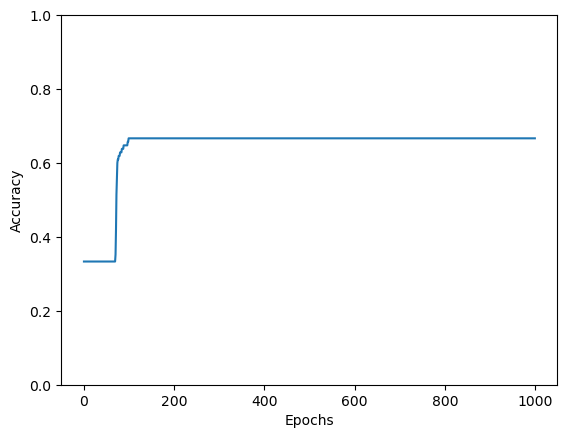

In [10]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train, 1000, 0.0001)

### The below code will change the epoch and learning rate and can see the model is still behaving the same, it does not take much effect post a certain number we increase

0.6666666666666666


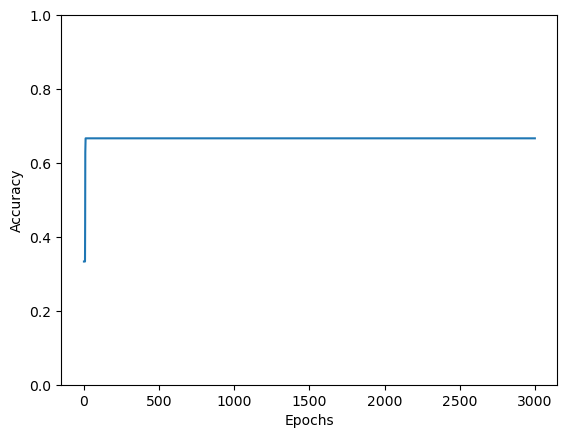

In [11]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train, 3000, 0.0008)

In [12]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.6666666666666666


### Plot the weights that are initialized inside the perceptron model is gradually increasing, as it keep update the weights for each iteration that we are running with the training set.

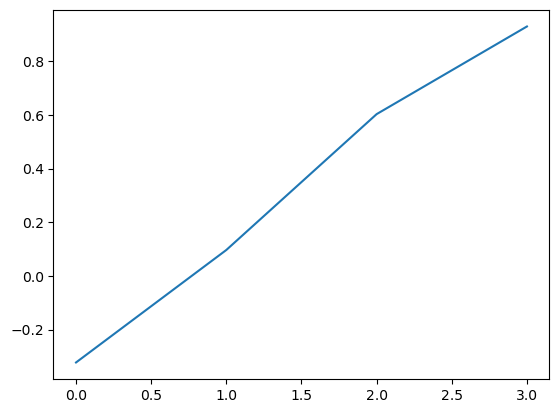

In [13]:
plt.plot(perceptron.w)
plt.show()

### modify the above perceptron function to save all the weights for each epoch and plot the same in a graph

In [14]:
class Perceptron_modified:
  
  def __init__ (self):
   # Initialize the weights and bias to None
    self.w = None
    self.b = None    
    
  def model(self, x):
    # Predict the output for a given input x usign teh weight and bias configured above
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
     # Iterate through each input x passed in the parameter and predict the output using the model declared above
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    # Initialize the weights as an array of ones with the same shape as the input X
    self.w = np.ones(X.shape[1])
    self.b = 0 #initialze the bias as 0
    
    weight_list = []  # will store the weights identified for each iteration in the training process
    
    accuracy = {}
    max_accuracy = 0
    
    
    #The epoch value here is the number of times the entire dataset is passed throught this model, Changing the epoch value determines 
    #the number of time it goes over each training set and applies the weight and biases, once the prediction is made by peceptron model
    #the weights and biases are updated to get better result 
    #we can increase or decrese the epoch, but incresing might lead to overfitting and decreasing too much may lead to underfitting
    #we need to identify the right point and use that as our final number.
    for i in range(epochs):
        # Iterate over each training example (x, y) which was split above
      for x, y in zip(X, Y):
         # store the prediction using the current weight and bias 
        y_pred = self.model(x)
        # Update the weights and bias based based on the prediction made above
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
            
      #Copy the new weight that is updated to the weight_list for tracking each weight identified as part of the training process
      weight_list.append(self.w.copy())
                   
        #store the accuracy from the prediction  
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    
    # Plot the weight list
    for i in range(len(weight_list[0])):
        plt.plot([weights[i] for weights in weight_list])
    plt.xlabel('Epochs')
    plt.ylabel('Weight')
    plt.show()

### After the modification of perceptron function, the weight starts at 1, but as the epoch increase the weight decreases and then become constant

0.6666666666666666


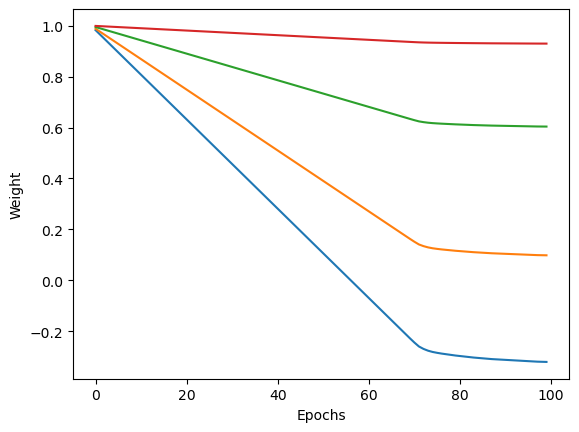

In [15]:
perceptron_m = Perceptron_modified()
perceptron_m.fit(X_train, Y_train, 100, 0.0001)